In [326]:
import numpy as np                               
import pandas as pd                              
import matplotlib.pyplot as plt                  
import cv2                                       
import tensorflow as tf                         
from PIL import Image                           
import os                                        
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical          
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization
import tqdm                                     
import warnings

In [327]:
data = []
labels = []
classes = 43

for i in range(classes):
    path = os.path.join(os.getcwd(),'train',str(i))
    images = os.listdir(path)
    
    for j in images:
        try:
            image = Image.open(path + '\\'+ j)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

In [328]:
data = np.array(data)
labels = np.array(labels)

In [329]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [330]:
data[39000]

array([[[17, 17, 19],
        [18, 18, 19],
        [18, 17, 18],
        ...,
        [20, 19, 23],
        [21, 19, 21],
        [21, 20, 21]],

       [[17, 19, 23],
        [18, 19, 20],
        [19, 19, 20],
        ...,
        [22, 21, 22],
        [24, 23, 24],
        [21, 21, 22]],

       [[20, 24, 26],
        [16, 18, 20],
        [17, 18, 20],
        ...,
        [20, 19, 21],
        [21, 20, 21],
        [19, 19, 19]],

       ...,

       [[20, 20, 25],
        [19, 19, 24],
        [19, 18, 23],
        ...,
        [30, 28, 32],
        [19, 22, 27],
        [18, 19, 24]],

       [[19, 19, 24],
        [17, 17, 22],
        [18, 17, 22],
        ...,
        [22, 26, 31],
        [18, 25, 31],
        [18, 24, 31]],

       [[16, 17, 21],
        [16, 16, 20],
        [17, 16, 21],
        ...,
        [46, 56, 74],
        [43, 54, 73],
        [42, 53, 73]]], dtype=uint8)

In [331]:
labels[4900]

3

In [332]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=68)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [333]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367, 43) (7842, 43)


In [334]:
y_train[20000]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [335]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

warnings.filterwarnings("ignore", category=DeprecationWarning)

In [336]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [337]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 22, 22, 32)        25632     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 11, 11, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 11, 11, 32)        128       
_________________________________________________________________
dropout_18 (Dropout)         (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 7, 7, 64)         

In [338]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))
#Final trainig of model

warnings.filterwarnings("ignore", category=DeprecationWarning)

Epoch 1/10
981/981 [==============================] - 61s 62ms/step - loss: 0.9578 - accuracy: 0.7376 - val_loss: 0.1326 - val_accuracy: 0.9635
Epoch 2/10
981/981 [==============================] - 59s 60ms/step - loss: 0.1833 - accuracy: 0.9455 - val_loss: 0.0589 - val_accuracy: 0.9857
Epoch 3/10
981/981 [==============================] - 59s 60ms/step - loss: 0.1095 - accuracy: 0.9675 - val_loss: 0.0523 - val_accuracy: 0.9852
Epoch 4/10
981/981 [==============================] - 58s 60ms/step - loss: 0.0900 - accuracy: 0.9726 - val_loss: 0.0649 - val_accuracy: 0.9830
Epoch 5/10
981/981 [==============================] - 58s 60ms/step - loss: 0.0714 - accuracy: 0.9780 - val_loss: 0.0645 - val_accuracy: 0.9813
Epoch 6/10
981/981 [==============================] - 59s 60ms/step - loss: 0.0713 - accuracy: 0.9787 - val_loss: 0.0272 - val_accuracy: 0.9926
Epoch 7/10
981/981 [==============================] - 61s 62ms/step - loss: 0.0608 - accuracy: 0.9820 - val_loss: 0.0256 - val_accuracy:

In [339]:
model.save("Trafic_signs_model.h5")

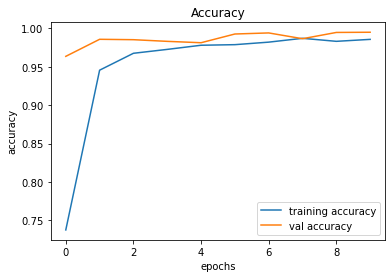

In [340]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

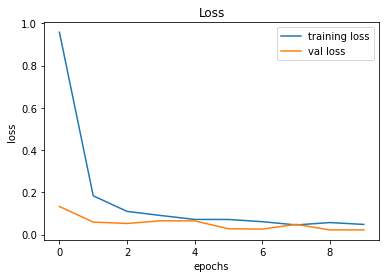

In [341]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [342]:
from sklearn.metrics import accuracy_score

In [343]:
y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

pred = model.predict_classes(X_test)

In [344]:
print(accuracy_score(labels, pred))

0.9647664291369754


### Predict

In [345]:
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)',      
            3:'Speed limit (50km/h)',       
            4:'Speed limit (60km/h)',      
            5:'Speed limit (70km/h)',    
            6:'Speed limit (80km/h)',      
            7:'End of speed limit (80km/h)',     
            8:'Speed limit (100km/h)',    
            9:'Speed limit (120km/h)',     
           10:'No passing',   
           11:'No passing veh over 3.5 tons',     
           12:'Right-of-way at intersection',     
           13:'Priority road',    
           14:'Yield',     
           15:'Stop',       
           16:'No vehicles',       
           17:'Veh > 3.5 tons prohibited',       
           18:'No entry',       
           19:'General caution',     
           20:'Dangerous curve left',      
           21:'Dangerous curve right',   
           22:'Double curve',      
           23:'Bumpy road',     
           24:'Slippery road',       
           25:'Road narrows on the right',  
           26:'Road work',    
           27:'Traffic signals',      
           28:'Pedestrians',     
           29:'Children crossing',     
           30:'Bicycles crossing',       
           31:'Beware of ice/snow',
           32:'Wild animals crossing',      
           33:'End speed + passing limits',      
           34:'Turn right ahead',     
           35:'Turn left ahead',       
           36:'Ahead only',      
           37:'Go straight or right',      
           38:'Go straight or left',      
           39:'Keep right',     
           40:'Keep left',      
           41:'Roundabout mandatory',     
           42:'End of no passing',      
           43:'End no passing veh > 3.5 tons' }

In [346]:
new_img= y_test["Path"].values[486]

In [347]:
def Predict(img):
    n_image = Image.open(img)
    n_image= n_image.resize((30,30))
    image= np.asarray(n_image)
    img = np.expand_dims(image,axis=0)
    pred = model.predict(img)
    score = tf.nn.softmax(pred[0])
    plt.imshow(n_image)
    print(
    "Sınıf Etiketi: {} \n Olasılık:  {:.2f}"
    .format(classes[np.argmax(score)], 100 * np.max(score))
)

Sınıf Etiketi: Right-of-way at intersection 
 Olasılık:  6.01


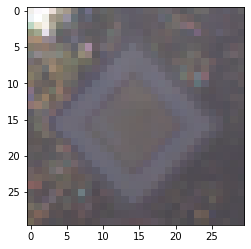

In [348]:
Predict(new_img)